# Após análise prévia, houve uma atualização no banco de dados, aqui segue o relatório da base atualizada

# Importando a base de dados

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('tips_atualizado.csv')

In [5]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [15]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [16]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [18]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [19]:
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
578,27.893117,2.426094,Sim,Sexta,Jantar,2
1974,17.139817,2.089125,Não,Sábado,Jantar,2
1723,19.884883,4.279276,Não,Domingo,Jantar,2
2660,13.138876,2.226609,Sim,Sexta,Almoço,2
1032,40.194210,1.998255,Sim,Sábado,Jantar,4
596,17.875049,3.870702,Não,Sábado,Jantar,2
1694,24.225570,1.698670,Sim,Sábado,Jantar,4
2864,32.337531,2.786882,Sim,Domingo,Jantar,4
2441,9.865257,1.775619,Não,Domingo,Jantar,3
1805,11.972795,1.375076,Sim,Sexta,Jantar,2


# Importando Seaborn

In [20]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 5.9MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [21]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, numpy, matplotlib, pandas
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [23]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

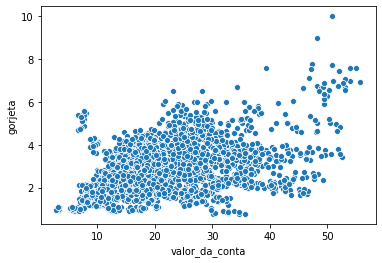

In [24]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [25]:
print('A base de dados contém {} registros.\n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros.

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## Criando campo porcentagem

In [26]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [27]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [28]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


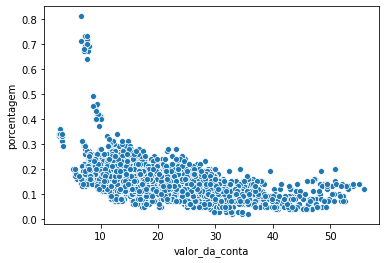

In [30]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

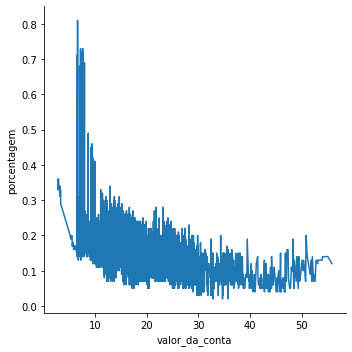

In [31]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem',kind = 'line', data = gorjetas)

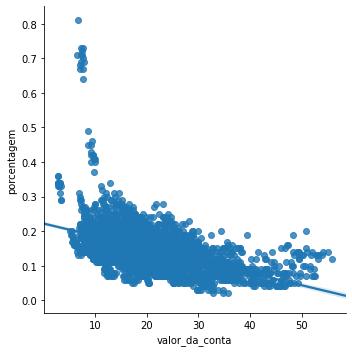

In [32]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

# Análise 2 - Sobremesa

In [33]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [34]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.00,1302.00,1302.00,1302.00
mean,20.80,2.71,2.41,0.15
std,9.90,1.16,0.81,0.09
min,2.80,0.77,1.00,0.02
25%,13.50,1.91,2.00,0.09
50%,17.92,2.43,2.00,0.15
75%,26.81,3.33,3.00,0.19
max,55.80,10.00,5.00,0.81


In [35]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.00,2114.00,2114.00,2114.00
mean,19.22,2.71,2.67,0.15
std,8.32,1.02,1.01,0.04
min,6.53,0.91,1.00,0.04
25%,13.28,1.93,2.00,0.12
50%,17.74,2.61,2.00,0.15
75%,22.75,3.28,3.00,0.18
max,53.09,9.00,6.00,0.33


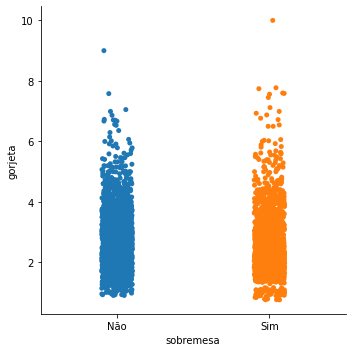

In [36]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

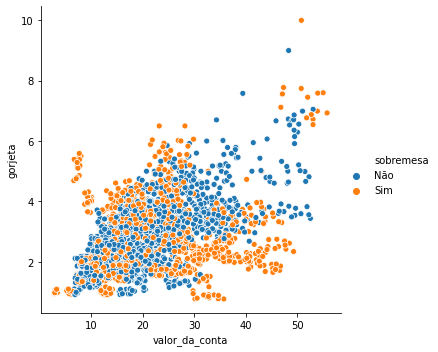

In [37]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

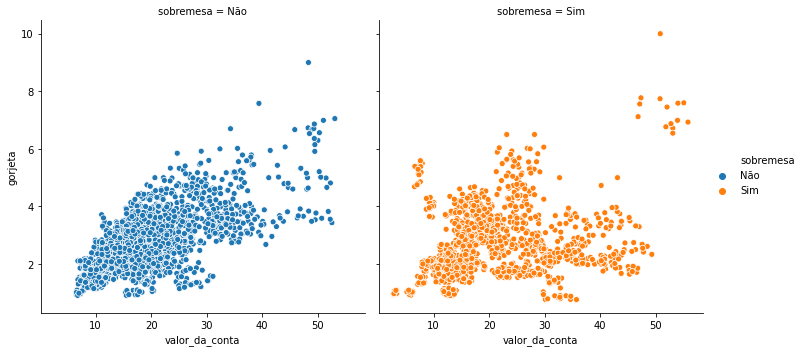

In [38]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

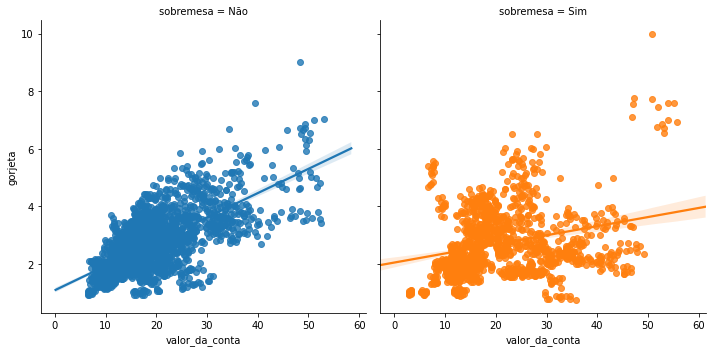

In [39]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

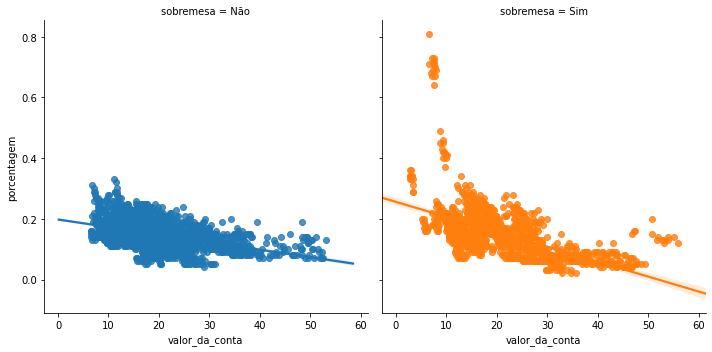

In [40]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

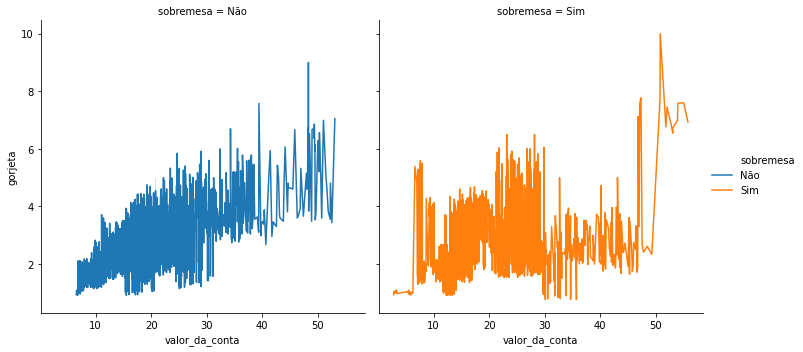

In [41]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta dos que pediram e não sobremesa**

## Teste de Hipótese 1 - Distribuição da taxa de gorjeta - Sobremesa

**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [42]:
from scipy.stats import ranksums

In [43]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [44]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [45]:
r = ranksums(sobremesa, sem_sobremesa)

In [46]:
print('O Valor do p-value é {}'.format(r.pvalue))

O Valor do p-value é 0.033144013617673405


**H<sup>alt</sup>**

**Na atualização, a distribuição da taxa da gorjeta, agora, não é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [47]:
  gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

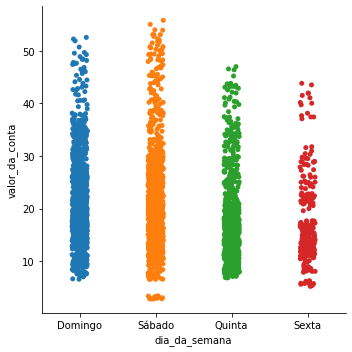

In [48]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

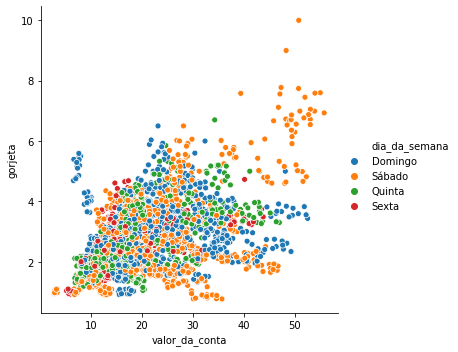

In [49]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

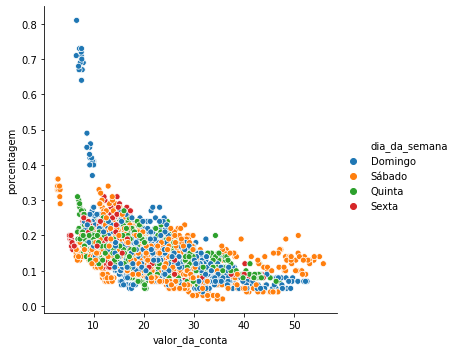

In [50]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

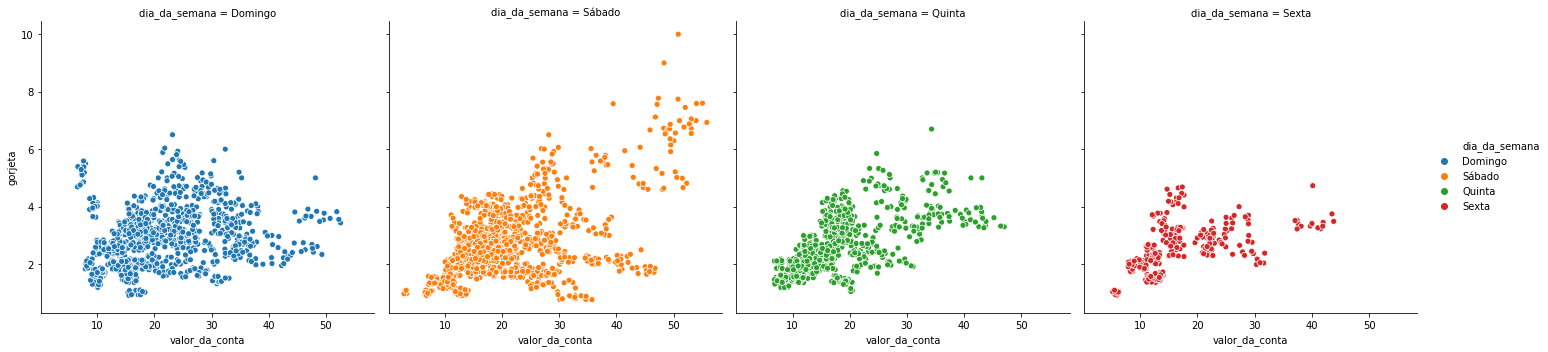

In [51]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana',data = gorjetas)

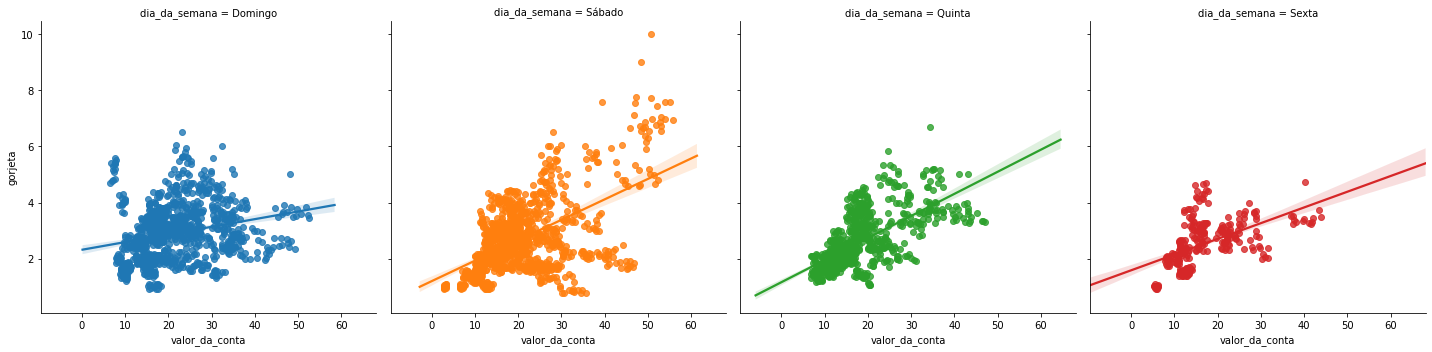

In [52]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana',data = gorjetas)

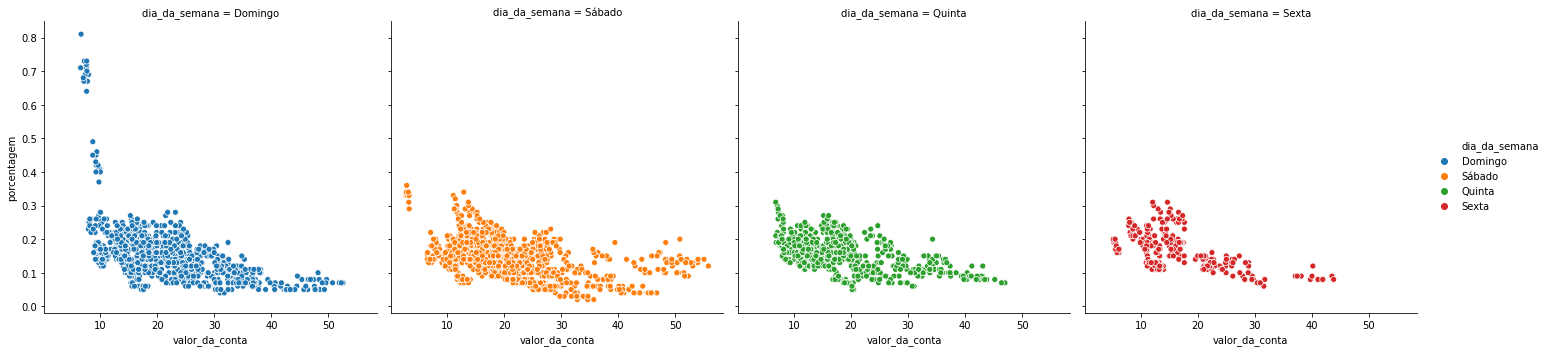

In [53]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana',data = gorjetas)

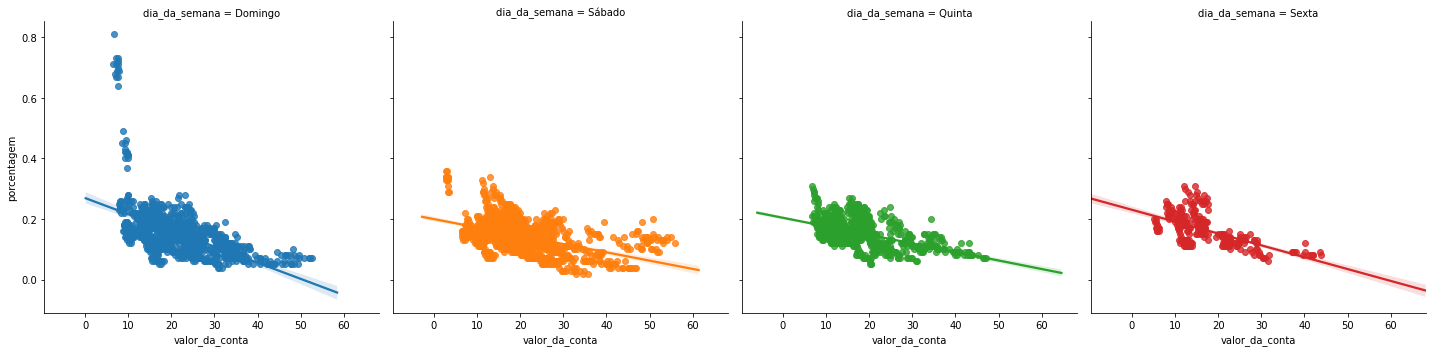

In [54]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana',data = gorjetas)

## Análise Descritiva

In [55]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [56]:
print('A média geral das gorjetas é {}'.format(media_geral_gorjetas))

A média geral das gorjetas é 2.7111892140916103


In [57]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [58]:
print('Frequência dos dias:')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de Hipótese 2 - Distribuição valor da conta - Sábado e Domingo

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no sábado e no domingo**

In [59]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [60]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [61]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


**H<sup>alt</sup>**

**Na atualização, a distribuição do valor da conta, agora, não é igual no sábado e no domingo**

#Análise 4 - Hora do Dia

In [62]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [63]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

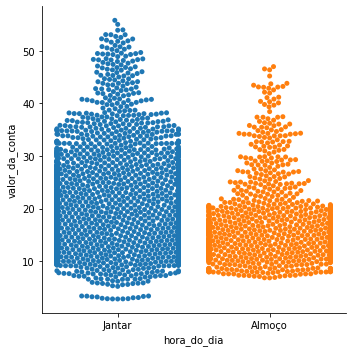

In [64]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

## Distplot, boxplot e violinplot

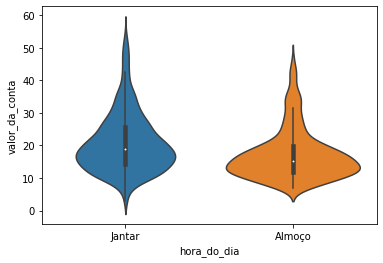

In [65]:
sns.violinplot(x ='hora_do_dia', y = 'valor_da_conta', data = gorjetas)

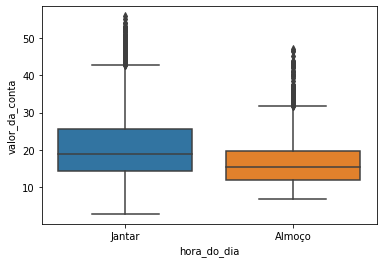

In [66]:
sns.boxplot(x ='hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [67]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

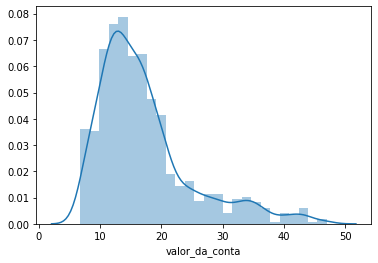

In [68]:
sns.distplot(almoco)

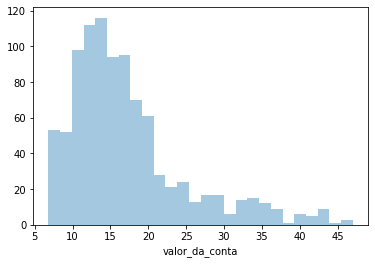

In [69]:
sns.distplot(almoco, kde = False)

In [70]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

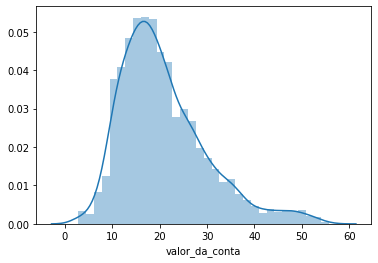

In [71]:
sns.distplot(jantar)

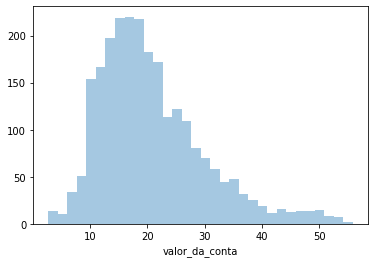

In [72]:
sns.distplot(jantar, kde = False)

In [73]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta',	'gorjeta',	'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de Hipótese 3 - Distribuição do valor da conta almoço e jantar

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no almoço e na janta**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no almoço e na janta**

In [74]:
r3 = ranksums(jantar, almoco)

In [75]:
print('O valor do p-value é {}'.format(r3.pvalue))

O valor do p-value é 5.169201062207143e-34


**H<sup>alt</sup>**

**Na atualização, a distribuição do valor da conta, permaneceu não igual no almoço e na janta**

## Teste de Hipótese 4 - Distribuição taxa da gorjeta - Almoço e Jantar

**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é igual no almoço e na janta**

**H<sup>alt</sup>**

**A distribuição da taxa da gorjeta não é igual no almoço e na janta**

In [76]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [77]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [78]:
r4 = ranksums(porcentagem_jantar, porcentagem_almoco)
print('O valor do p-value é {}'.format(r4.pvalue))

O valor do p-value é 1.3785725618355523e-11


**H<sup>alt</sup>**

**Na atualização, a distribuição da taxa da gorjeta, permaneceu não sendo igual no almoço e na janta**